In [1]:
!jupyter nbextension uninstall --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --sys-prefix
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


Uninstalling jupyter-js-widgets jupyter-js-widgets/extension
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts\jupyter-nbextension.EXE\__main__.py", line 7, in <module>
  File "C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\jupyter_core\application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from ipywidgets import FloatSlider, Button, VBox, HTML, Output
from IPython.display import display, clear_output


In [3]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [5]:
# dataset loading
data = pd.read_csv("Tree_Emotion_Dataset_Extended.csv")

print("✅ Dataset loaded successfully!")
display(data)



✅ Dataset loaded successfully!


,tree_id,tree_name,location,timestamp,mean_voltage,entropy,temp,humidity,moisture,light,label
0,TREE_001,Mahogany,EcoGarden,2025-11-04 01:33:14,0.003261,0.880865,36.353743,47.257888,22.100897,966.561675,Heat_Stress
1,TREE_002,Palm,NatureCore,2025-11-04 03:31:14,0.001432,0.999150,37.285897,41.792776,23.625899,768.639131,Heat_Stress
2,TREE_003,Palm,LeafyHeights,2025-11-04 01:00:14,0.002816,0.798331,38.075804,41.879830,25.919645,973.923136,Heat_Stress
3,TREE_004,Coconut,EcoZone-A,2025-11-03 15:03:14,0.003468,0.541338,39.731805,49.604399,32.633186,722.238249,Heat_Stress
4,TREE_005,Teak,TreeValley,2025-11-05 21:51:14,0.001017,0.525599,33.501201,51.685467,30.453315,457.215683,Thirsty
...,...,...,...,...,...,...,...,...,...,...,...
95,TREE_096,Lemon,EcoZone-A,2025-11-04 19:36:14,0.002416,0.626045,38.130888,48.760522,25.236599,804.840827,Heat_Stress
96,TREE_097,Peepal,EcoGarden,2025-11-05 09:50:14,0.001935,0.896391,36.571983,48.895118,25.669867,618.116505,Thirsty
97,TREE_098,Banyan,EcoZone-A,2025-11-03 05:21:14,0.002624,0.609047,32.019993,50.858598,40.602404,536.653164,Thirsty
98,TREE_099,Cashew,TreeValley,2025-11-02 23:47:14,0.002940,0.555035,26.921940,78.306891,79.796540,478.643157,Happy


✅ Model trained successfully with accuracy: 100.00%


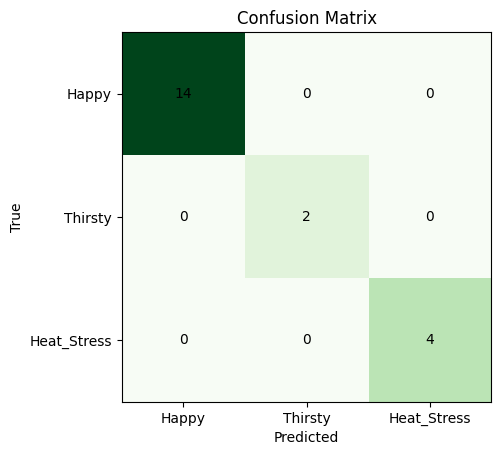

In [6]:
X = data.drop(["tree_id", "tree_name", "location", "timestamp", "label"], axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"✅ Model trained successfully with accuracy: {acc*100:.2f}%")

#  confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Happy", "Thirsty", "Heat_Stress"])
plt.imshow(cm, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(3), ["Happy", "Thirsty", "Heat_Stress"])
plt.yticks(range(3), ["Happy", "Thirsty", "Heat_Stress"])
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.show()


In [7]:
temp_slider = FloatSlider(description='Temperature (°C)', min=20, max=40, step=0.5, value=30)
humidity_slider = FloatSlider(description='Humidity (%)', min=40, max=80, step=1, value=60)
moisture_slider = FloatSlider(description='Soil Moisture (%)', min=20, max=80, step=1, value=50)
light_slider = FloatSlider(description='Light (Lux)', min=200, max=1000, step=20, value=600)

predict_button = Button(description="🌿 Predict Tree Emotion", button_style='success')
result_label = HTML("<h3>Adjust sliders and click Predict 🌿</h3>")
out_box = Output()
history = []

def predict_emotion():
    mean_voltage = np.random.uniform(0.001, 0.004)
    entropy = np.random.uniform(0.5, 1.0)
    sample = np.array([[mean_voltage, entropy,
                        temp_slider.value, humidity_slider.value,
                        moisture_slider.value, light_slider.value]])
    prediction = model.predict(sample)[0]
    return prediction

def on_predict(b):
    clear_output(wait=True)
    display(VBox([temp_slider, humidity_slider, moisture_slider, light_slider, predict_button, result_label, out_box]))
    pred = predict_emotion()
    history.append(pred)
    if pred == "Happy":
        msg, color = "🌳 The tree is happy and healthy!", "green"
    elif pred == "Thirsty":
        msg, color = "💧 The tree might need water soon.", "orange"
    else:
        msg, color = "🔥 The tree is under heat stress!", "red"

    result_label.value = f"<h3 style='color:{color};'>Predicted Emotion: {pred}</h3><p>{msg}</p>"

predict_button.on_click(on_predict)
display(VBox([temp_slider, humidity_slider, moisture_slider, light_slider, predict_button, result_label, out_box]))


✅ Model Accuracy: 100.00%

📋 Classification Report:
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        14
     Thirsty       1.00      1.00      1.00         4
 Heat_Stress       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



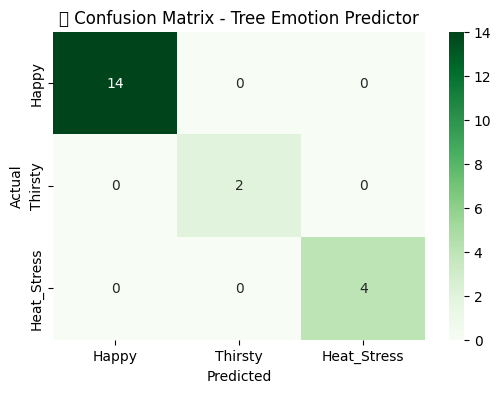

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate model
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc*100:.2f}%")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Happy", "Thirsty", "Heat_Stress"]))

# Confusion matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred, labels=["Happy", "Thirsty", "Heat_Stress"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Happy", "Thirsty", "Heat_Stress"], yticklabels=["Happy", "Thirsty", "Heat_Stress"])
plt.title("🌿 Confusion Matrix - Tree Emotion Predictor")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load dataset
df = pd.read_csv("Tree_Emotion_Dataset_Extended.csv")

# Use correct column names
X = df[['temp', 'humidity', 'moisture', 'light']]
y = df['label']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save model
pickle.dump(model, open("tree_model.pkl", "wb"))

print("MODEL SAVED SUCCESSFULLY → tree_model.pkl")


MODEL SAVED SUCCESSFULLY → tree_model.pkl


In [3]:
import pandas as pd
df = pd.read_csv("Tree_Emotion_Dataset_Extended.csv")
df.head()


,tree_id,tree_name,location,timestamp,mean_voltage,entropy,temp,humidity,moisture,light,label
0,TREE_001,Mahogany,EcoGarden,2025-11-04 01:33:14,0.003261,0.880865,36.353743,47.257888,22.100897,966.561675,Heat_Stress
1,TREE_002,Palm,NatureCore,2025-11-04 03:31:14,0.001432,0.999150,37.285897,41.792776,23.625899,768.639131,Heat_Stress
2,TREE_003,Palm,LeafyHeights,2025-11-04 01:00:14,0.002816,0.798331,38.075804,41.879830,25.919645,973.923136,Heat_Stress
3,TREE_004,Coconut,EcoZone-A,2025-11-03 15:03:14,0.003468,0.541338,39.731805,49.604399,32.633186,722.238249,Heat_Stress
4,TREE_005,Teak,TreeValley,2025-11-05 21:51:14,0.001017,0.525599,33.501201,51.685467,30.453315,457.215683,Thirsty


In [4]:
df.columns


Index(['tree_id', 'tree_name', 'location', 'timestamp', 'mean_voltage',
       'entropy', 'temp', 'humidity', 'moisture', 'light', 'label'],
      dtype='object')